# EDA de One Piece.
### ¿Cuál es el mejor capítulo del mayor anime de la historia?
En este análisis intentaré identificar el posible mejor capítulo de la serie de Eiichiro Oda en base a la opinión del público. Para ello buscaré todos los datos que pueda en diferentes páginas de internet para recabar datos mediante WebScrapping, y también utilizaré distintos Datasets ya fabricados que he encontrado en Kaggle para reunir el mayor numero de valoraciones posible.

#### Primera fase. Webscrapping.
Para conseguir una base inicial de datos me he apoyado en el WebScrapping, encontrando una página en la que los capítulos están numerados y valorados.

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests

In [2]:
#Se hace la sopa principal para ir sacando los datos
url = 'https://www.imdb.com/title/tt0388629/episodes?year=2000'
r = requests.get(url, 'lxml')
op_soup=bs(r.text, 'lxml')

In [3]:
#En imdb los capitulos pares e impares tienen codigos diferentes
#por lo que hay que sacar dos listas separadas y luego unirlas.
odd= op_soup.find_all(class_= 'list_item odd')
even= op_soup.find_all(class_='list_item even' )

#Se hace una lista de nones de la len de ambas listas y despues
#se rellena con los valores correspondientes
capitulos_total= [None]*(len(odd)+len(even))
capitulos_total[::2]=odd
capitulos_total[1::2]=even

In [4]:
#Numero de paginas, año y lista principal
count= np.arange(1,24)
año=2000
lista_episodios= []

for paginas in count:
    url = 'https://www.imdb.com/title/tt0388629/episodes?year='+str(año)
    
    r = requests.get(url, 'lxml')
    op_soup=bs(r.text, 'lxml')
    url 

    #sopas grandes
    odd= op_soup.find_all(class_= 'list_item odd')
    even= op_soup.find_all(class_='list_item even' )

    capitulos_total= [None]*(len(odd)+len(even))
    capitulos_total[::2]=odd
    capitulos_total[1::2]=even    

    num=1
    
    #Sopa de cada capitulo
    for episodio in capitulos_total:

        print('episodio {}, año {}'.format(num, año))
        num+=1
            #Nombre del capítulo
        try:
            name= episodio.find('strong').find('a').get('title')
        except:
            name= None
            print(name)

        #Numero de episodio
        try:
            ep= int(episodio.find('div', class_= 'image').find('div').find('div').text.replace('S1, Ep', ''))
        except:
            ep= None
            print(ep)

        #Valoracion
        try:
            rate= float(episodio.find('span', class_= 'ipl-rating-star__rating').text)
        except:
            rate= None
            print(rate)
        
        #Votos
        try:
            votes= int(episodio.find('span', class_= 'ipl-rating-star__total-votes').text.replace('(', '').replace(')','').replace(',',''))
        except:
            votes=None
            print(votes)
        
        #Se hace un diccionario y pa la lista
        op_dict={'Nombre':name,
                'Episodio':ep,
                'Valoracion':rate,
                'Votos':votes}
        lista_episodios.append(op_dict)

        #Ultimo capítulo, porque en la página sigue habiendo algunos no estrenados y los coge
        if name == ('Fight Against the Dark Night - The Commander-in-Chief of Wano Country Sounds Off'):
            break
    
    año+=1

#Y se haria el dataframe con los episodios
df_op=pd.DataFrame(lista_episodios)

episodio 1, año 2000
episodio 2, año 2000
episodio 3, año 2000
episodio 4, año 2000
episodio 5, año 2000
episodio 6, año 2000
episodio 7, año 2000
episodio 8, año 2000
episodio 9, año 2000
episodio 10, año 2000
episodio 11, año 2000
episodio 12, año 2000
episodio 13, año 2000
episodio 14, año 2000
episodio 15, año 2000
episodio 16, año 2000
episodio 17, año 2000
episodio 1, año 2001
episodio 2, año 2001
episodio 3, año 2001
episodio 4, año 2001
episodio 5, año 2001
episodio 6, año 2001
episodio 7, año 2001
episodio 8, año 2001
episodio 9, año 2001
episodio 10, año 2001
episodio 11, año 2001
episodio 12, año 2001
episodio 13, año 2001
episodio 14, año 2001
episodio 15, año 2001
episodio 16, año 2001
episodio 17, año 2001
episodio 18, año 2001
episodio 19, año 2001
episodio 20, año 2001
episodio 21, año 2001
episodio 22, año 2001
episodio 23, año 2001
episodio 24, año 2001
episodio 25, año 2001
episodio 26, año 2001
episodio 27, año 2001
episodio 28, año 2001
episodio 29, año 2001
episod

In [5]:
#En imdb los episodios estan un poco desordenados y falta el primero. 
df_op = df_op.sort_values(by='Episodio').reset_index(drop=True)

#Meto el primero con 0 puntos y 0 votaciones
ep1= pd.DataFrame([{'Nombre':'Ore wa Rufi! Kaizoku Ō ni naru Otoko da!',
        'Episodio':1,
        'Valoracion':0,
        'Votos':0}])

capitulos_op_definitivo = ep1.append(df_op)
capitulos_op_definitivo.reset_index(drop=True, inplace=True)

#Y se guarda en un csv
capitulos_op_definitivo.to_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_capitulos_webscrapping.csv')
capitulos_op_definitivo.head()

,Nombre,Episodio,Valoracion,Votos
0,Ore wa Rufi! Kaizoku Ō ni naru Otoko da!,1.0,0.0,0
1,Daikengo Arawaru! Kaizokugari Roronoa Zoro,2.0,7.7,1407
2,Mogan tai Rufi! Nazo no Bishojo wa Dare?,3.0,7.7,1145
3,Rufi no Kako! Akagami no Shankusu Tojo,4.0,8.3,1473
4,Kyofu Nazo no Chikara! Kaizoku Doke Bagi-sencho!,5.0,7.5,979


### Fase dos. Limpiar y añadir datos. 
He encontrado más de un dataset con datos similares, por lo que voy a limpiar los datos resultantes del WebScrapping y añadirles la información de los datasets de la forma que proceda. 

Como son dos datasets el proceso será el mismo dos veces.

In [6]:
op= pd.read_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_capitulos_webscrapping.csv', index_col='Unnamed: 0')
op_2=pd.read_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_ONE PIECE_rates2.csv')

In [7]:
#Para poder aplicar la funcion que calcula la nota según los porcentajes de votos hay que tener los dos df juntos, y para eso tienen que tener la
#misma longitud. Asi que relleno op_2 con ceros para que no afecte a los porcentajes
zero= pd.DataFrame(np.zeros(shape=(79,2)))
zero.rename(columns={0:'average_rating', 1:'total_votes'}, inplace=True)

op_sum= op_2[['total_votes', 'average_rating']]
op_sum= op_sum.append(zero)

#Ahora ya se pueden juntar
op_sum.reset_index(drop=True, inplace=True)
op_join= op.join(op_sum)
op_join

,Nombre,Episodio,Valoracion,Votos,total_votes,average_rating
0,Ore wa Rufi! Kaizoku Ō ni naru Otoko da!,1.0,0.0,0,647,7.6
1,Daikengo Arawaru! Kaizokugari Roronoa Zoro,2.0,7.7,1407,473,7.8
2,Mogan tai Rufi! Nazo no Bishojo wa Dare?,3.0,7.7,1145,428,7.7
3,Rufi no Kako! Akagami no Shankusu Tojo,4.0,8.3,1473,449,8.1
4,Kyofu Nazo no Chikara! Kaizoku Doke Bagi-sencho!,5.0,7.5,979,370,7.5
...,...,...,...,...,...,...
1032,The Conclusion! Luffy's Accelerating Fist of t...,1033.0,9.4,1125,0.0,0.0
1033,Luffy Defeated! The Straw Hats in Jeopardy?!,1034.0,7.8,276,0.0,0.0
1034,The Animal Kingdom Pirates Trample Down! The E...,1035.0,7.6,261,0.0,0.0
1035,Fight Against the Dark Night - The Commander-i...,1036.0,8.3,309,0.0,0.0


In [8]:
#en op2 había valores que no se pueden sumar, hay strings y comas y demas
def procesadora(x):
    if type(x)==str:
        x= x.replace(',', '')
        return float(x)
    else:
        return x
op_join['average_rating']=op_join['average_rating'].apply(procesadora)

op_join['total_votes']= op_join['total_votes'].apply(procesadora)

In [9]:
#el porcentaje se hace con una funcion
def porcentaje (votosA, votosB, notaA, notaB):
    a= votosA/(votosA+votosB)
    b= votosB/(votosA+votosB)
    nota_final= notaA*a+notaB*b
    return round(nota_final,2)

op['Valoracion']= porcentaje(op_join['Votos'], op_join['total_votes'], op_join['Valoracion'], op_join['average_rating'])

#y se suman tambien los votos. Lo dejo comentado porque al ejecutar el cuadro se vuelve a sumar
op['Votos']=op['Votos']+op_join['total_votes']

op

,Nombre,Episodio,Valoracion,Votos
0,Ore wa Rufi! Kaizoku Ō ni naru Otoko da!,1.0,7.60,647.0
1,Daikengo Arawaru! Kaizokugari Roronoa Zoro,2.0,7.73,1880.0
2,Mogan tai Rufi! Nazo no Bishojo wa Dare?,3.0,7.70,1573.0
3,Rufi no Kako! Akagami no Shankusu Tojo,4.0,8.25,1922.0
4,Kyofu Nazo no Chikara! Kaizoku Doke Bagi-sencho!,5.0,7.50,1349.0
...,...,...,...,...
1032,The Conclusion! Luffy's Accelerating Fist of t...,1033.0,9.40,1125.0
1033,Luffy Defeated! The Straw Hats in Jeopardy?!,1034.0,7.80,276.0
1034,The Animal Kingdom Pirates Trample Down! The E...,1035.0,7.60,261.0
1035,Fight Against the Dark Night - The Commander-i...,1036.0,8.30,309.0


In [10]:
#Lo guardo por si acaso y sigo
op.to_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\limpieza1.csv')
op3= pd.read_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_Episodes_Rating_dataset_Kaggle.csv')
op3.head()

,season,episode,name,date,total_votes,average_rating,rank,trend
0,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,"1,316",7.8,"15,683",25
1,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,853,7.9,"22,891",14
2,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,718,7.8,"26,808",13
3,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,829,8.4,"21,230",40
4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,626,7.6,"30,990",11


In [11]:
#Me quedo solo con las columnas que me interesan y les añado la colas de ceros
op3 = op3[['total_votes', 'average_rating']]
a = len(op)-len(op3)
zero = pd.DataFrame(np.zeros(shape=(a,2)))
zero.rename(columns={0:'average_rating', 1:'total_votes'}, inplace=True)

op3 = op3.append(zero)
op3.reset_index(drop=True, inplace=True)
op3

,total_votes,average_rating
0,"1,316",7.8
1,853,7.9
2,718,7.8
3,829,8.4
4,626,7.6
...,...,...
1032,0.0,0.0
1033,0.0,0.0
1034,0.0,0.0
1035,0.0,0.0


In [12]:
#Ahora hay que ver qué hay en op3
def procesadora(i):
    if type(i)== str:
        i = i.replace(',', '')
        return float(i)
    else:
        return i
op3['total_votes']=op3['total_votes'].apply(procesadora)
op3['average_rating']=op3['average_rating'].apply(procesadora)

#Y ya se pueden juntar
op_join=op.join(op3)
op_join

,Nombre,Episodio,Valoracion,Votos,total_votes,average_rating
0,Ore wa Rufi! Kaizoku Ō ni naru Otoko da!,1.0,7.60,647.0,1316.0,7.8
1,Daikengo Arawaru! Kaizokugari Roronoa Zoro,2.0,7.73,1880.0,853.0,7.9
2,Mogan tai Rufi! Nazo no Bishojo wa Dare?,3.0,7.70,1573.0,718.0,7.8
3,Rufi no Kako! Akagami no Shankusu Tojo,4.0,8.25,1922.0,829.0,8.4
4,Kyofu Nazo no Chikara! Kaizoku Doke Bagi-sencho!,5.0,7.50,1349.0,626.0,7.6
...,...,...,...,...,...,...
1032,The Conclusion! Luffy's Accelerating Fist of t...,1033.0,9.40,1125.0,0.0,0.0
1033,Luffy Defeated! The Straw Hats in Jeopardy?!,1034.0,7.80,276.0,0.0,0.0
1034,The Animal Kingdom Pirates Trample Down! The E...,1035.0,7.60,261.0,0.0,0.0
1035,Fight Against the Dark Night - The Commander-i...,1036.0,8.30,309.0,0.0,0.0


In [13]:
#Y se hace la función
def porcentaje (votosA, votosB, notaA, notaB):
    a= votosA/(votosA+votosB)
    b= votosB/(votosA+votosB)
    nota_final= notaA*a+notaB*b
    return round(nota_final,2)

op['Valoracion']= porcentaje(op_join['Votos'], op_join['total_votes'], op_join['Valoracion'], op_join['average_rating'])
op['Votos']= op['Votos']+op3['total_votes']
op

,Nombre,Episodio,Valoracion,Votos
0,Ore wa Rufi! Kaizoku Ō ni naru Otoko da!,1.0,7.73,1963.0
1,Daikengo Arawaru! Kaizokugari Roronoa Zoro,2.0,7.78,2733.0
2,Mogan tai Rufi! Nazo no Bishojo wa Dare?,3.0,7.73,2291.0
3,Rufi no Kako! Akagami no Shankusu Tojo,4.0,8.30,2751.0
4,Kyofu Nazo no Chikara! Kaizoku Doke Bagi-sencho!,5.0,7.53,1975.0
...,...,...,...,...
1032,The Conclusion! Luffy's Accelerating Fist of t...,1033.0,9.40,1125.0
1033,Luffy Defeated! The Straw Hats in Jeopardy?!,1034.0,7.80,276.0
1034,The Animal Kingdom Pirates Trample Down! The E...,1035.0,7.60,261.0
1035,Fight Against the Dark Night - The Commander-i...,1036.0,8.30,309.0


In [14]:
#Antes de guardarlo añado una columna que se refiere al salto temporal, porque creo que puede ser util luego
#El salto temporal se da en el capítulo 598.
op['TimeSkip']=0
op['TimeSkip'][516:]=1

C:\Users\nicoc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
# Y lo vuelvo a guardas por si acaso
op.to_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_Limpieza2.csv')

### Fase tres. Añadir los arcos. 
El anime está dividido en sagas que serían como temporadas, cada temporada está a su vez dividido en arcos que son bastante más cortos. Hay algunos muy populares y muy halagados mientras que otros son relativamente peores, por lo que creo que es interesante añadirlos para poder utilizarlos como parte del análisis. 

Para poder hacerlo cuento con un dataset que contiene información de los arcos, como el número de capítulos en cada uno, los minutos o el porcentaje sobre el total. También tiene información sobre el manga, pero no es lo que interesa ahora.

In [16]:
op_eps= op
op_arcs= pd.read_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_OnePieceArcsKaggle.csv')

op_arcs= op_arcs[['Arc', 'Start onEpisode', 'TotalEpisodes', 'TotalMinutes(avg 24)', 'Anime%']]
op_arcs['Numero']= np.arange(1,52) #Añado también una lista para saber cuál es el número decada arco
op_arcs.head()

,Arc,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%,Numero
0,Romance Dawn Arc,1,3,72,0.3%,1
1,Orange Town Arc,4,5,120,0.5%,2
2,Syrup Village Arc,9,10,240,1.0%,3
3,Baratie Arc,19,12,288,1.2%,4
4,Arlong Park Arc,31,15,360,1.5%,5


In [17]:
#Me doy cuenta de que el df de arcos es más corto, por lo que hago un replace en los episodios para que llegue hasta el final del otro df.
op_arcs['TotalEpisodes']= op_arcs['TotalEpisodes'].replace(70, 78)
op_arcs

,Arc,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%,Numero
0,Romance Dawn Arc,1,3,72,0.3%,1
1,Orange Town Arc,4,5,120,0.5%,2
2,Syrup Village Arc,9,10,240,1.0%,3
3,Baratie Arc,19,12,288,1.2%,4
4,Arlong Park Arc,31,15,360,1.5%,5
5,Buggy Side Story Arc,46,2,48,0.2%,6
6,Loguetown Arc,48,6,144,0.6%,7
7,Warship Island Arc,54,8,192,0.8%,8
8,Reverse Mountain Arc,62,2,48,0.2%,9
9,Whiskey Peak Arc,64,4,96,0.4%,10


In [18]:
#para porder añadirlos hago una lista vacía en la que cada arco se repite según el número de capítulos que pertenezcan al arco
lista_arcos= list(op_arcs['Arc'])
lista_episodios=list(op_arcs['TotalEpisodes'])

nueva_lista=[]
for i in range(len(lista_arcos)):
    
    for j in range((lista_episodios[i])):
        
       
        nueva_lista.append(lista_arcos[i])

#Y añado al final un extra para el capítulo de Barto
nueva_lista.append('Extra Ep')

In [19]:
#Y se añade al df
op_eps['Arco'] = nueva_lista

op_eps.to_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_Onepiece_capitulos.csv')

op_eps.head()

,Nombre,Episodio,Valoracion,Votos,TimeSkip,Arco
0,Ore wa Rufi! Kaizoku Ō ni naru Otoko da!,1.0,7.73,1963.0,0,Romance Dawn Arc
1,Daikengo Arawaru! Kaizokugari Roronoa Zoro,2.0,7.78,2733.0,0,Romance Dawn Arc
2,Mogan tai Rufi! Nazo no Bishojo wa Dare?,3.0,7.73,2291.0,0,Romance Dawn Arc
3,Rufi no Kako! Akagami no Shankusu Tojo,4.0,8.30,2751.0,0,Orange Town Arc
4,Kyofu Nazo no Chikara! Kaizoku Doke Bagi-sencho!,5.0,7.53,1975.0,0,Orange Town Arc


Ahora estaría bien saber el valor que se le da a cada arco en función de los capítulos
Para saber el valor que realmente tendría cada arco, primero vemos el valor que tiene cada cap dentro del arco
según el número de votos que haya recibido cada cual. 

La mejor manera que se me ha ocurrido es similar a lo anterior. Con un groupby hacer una suma del total de votos de cada arco;
después iterarlo para que lleguen a los 1037 valores; y finalmente dividir los votos de cada cap entre el total del arco, obteniendo el porcentaje.

In [20]:
df_op = op_eps
sum_votos_por_arco= list(df_op.groupby('Arco', sort= False)['Votos'].sum())

#Por temas de índice hay que sacar el capítulo de barto y volver a meterlo al final porque no aparece en el df de arcos. 
#Pero como es el último no pasa nada
barto = sum_votos_por_arco.pop()

votos_por_arco_final=[]
for i in range(len(sum_votos_por_arco)):
    for j in range(lista_episodios[i]):
        votos_por_arco_final.append(sum_votos_por_arco[i])

votos_por_arco_final.append(barto)
len(votos_por_arco_final)

1037

In [21]:
#Después solo habría que calcular el porcentaje que supone cada capítulo y multiplicarlo por su valor
porcentaje = df_op['Votos']/votos_por_arco_final
valor_relativo= df_op['Valoracion']*porcentaje
valor_relativo

0       2.171746
1       3.043186
2       2.534626
3       2.221787
4       1.447091
          ...   
1032    0.041633
1033    0.008475
1034    0.007809
1035    0.010097
1036    5.200000
Length: 1037, dtype: float64

In [22]:
#Para hacer la suma lo meto en un df con todos los arcos y el numero total de capitulos y hago un groupby
valor_relativo
nueva_lista #Esta lista la he creado más arriba para poder introducir los arcos en el df principal
notas_arcos= pd.DataFrame({'Arcos':nueva_lista, 'Nota':valor_relativo})
lista_nota_arcos= notas_arcos.groupby('Arcos', sort=False)['Nota'].sum()


In [23]:
#Hago un nuevo df con los arcos que incluya las motas relativas. Saco los arcos del df de arcos original añadiendo a barto
arcos = list(op_arcs['Arc'])
arcos.append('Extra Ep')
df_arcos=pd.DataFrame({'Arcos':arcos, 'Valoracion/CapsenArco': list(lista_nota_arcos)})

df_arcos.head()

,Arcos,Valoracion/CapsenArco
0,Romance Dawn Arc,7.749558
1,Orange Town Arc,7.829799
2,Syrup Village Arc,7.567111
3,Baratie Arc,8.122435
4,Arlong Park Arc,8.172897


In [24]:
#Además estaría bien poder ver tb el número de capitulos y el porcentaje relativo de cada arco
eps=list(op_arcs['TotalEpisodes'])
eps.append(1)
df_arcos['NumeroEpisodios']=eps

capitulos= list(op_arcs.groupby('Arc', sort= False)['TotalEpisodes'].sum())
capitulos.append(1)

porcentaje_arco = []
for i in range(len(capitulos)):
    j = round(capitulos[i]/1037,4)*100#Redondeandolo a 4 es cuando más se acerca la suma al 1
    porcentaje_arco.append(j)


df_arcos['Porcentaje%']=porcentaje_arco
df_arcos.head()

,Arcos,Valoracion/CapsenArco,NumeroEpisodios,Porcentaje%
0,Romance Dawn Arc,7.749558,3,0.29
1,Orange Town Arc,7.829799,5,0.48
2,Syrup Village Arc,7.567111,10,0.96
3,Baratie Arc,8.122435,12,1.16
4,Arlong Park Arc,8.172897,15,1.45


In [25]:
df_arcos.to_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_OnePieceArcs.csv')

### Fase Cuatro. Análisis.
Una vez que ya están ambos datasets listos se puede comenzar a analizar los datos. 
Vamos a necesitar nuevas librerias. 

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly as py

df_arcos= pd.read_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_OnePieceArcs.csv', index_col='Unnamed: 0')
df_caps= pd.read_csv(r'C:\Users\nicoc\Desktop\EDA definitivo\data\a_Onepiece_capitulos.csv', index_col='Unnamed: 0')

,Arcos,Valoracion/CapsenArco,NumeroEpisodios,Porcentaje%
0,Romance Dawn Arc,7.749558,3,0.29
1,Orange Town Arc,7.829799,5,0.48
2,Syrup Village Arc,7.567111,10,0.96
3,Baratie Arc,8.122435,12,1.16
4,Arlong Park Arc,8.172897,15,1.45


In [28]:
#Info general
print('Info Capitulos')
print(df_caps.nunique())
print()
print('Media de puntuacion:', df_caps['Valoracion'].mean())
print('Mediana de puntuacion:',df_caps['Valoracion'].median())
print('Variaza de puntuacion: ', df_caps['Valoracion'].var())
print('')
print('Media de votos por capítulo:', df_caps['Votos'].mean())
print('Mediana de votos por capítulo:',df_caps['Votos'].median())
print('Variaza de votos por capítulo:', df_caps['Votos'].var() )
print('Total de votos:',df_caps['Votos'].sum() )

Info Capitulos
Nombre        1037
Episodio      1036
Valoracion     279
Votos          736
TimeSkip         2
Arco            52
dtype: int64

Media de puntuacion: 8.025824493731918
Mediana de puntuacion: 8.01
Variaza de puntuacion:  0.49421140932225804

Media de votos por capítulo: 1314.907425265188
Mediana de votos por capítulo: 895.0
Variaza de votos por capítulo: 1703163.6748193295
Total de votos: 1363559.0


In [29]:
print('Info Arcos')
print('Media de votos por arco:', df_arcos['Valoracion/CapsenArco'].mean())
print('Mediana de votos por arco:', df_arcos['Valoracion/CapsenArco'].median())
print('Variaza de votos por arco:', df_arcos['Valoracion/CapsenArco'].var())
print()
print('Media de número de espisodios:', df_arcos['NumeroEpisodios'].mean())
print('Mediana de número de espisodios:', df_arcos['NumeroEpisodios'].median())
print('Variaza de episodios:', df_arcos['NumeroEpisodios'].var())
print('Arco más largo: ', df_arcos['NumeroEpisodios'].max())
print('Arco más corto: ', df_arcos['NumeroEpisodios'].min())

Info Arcos
Media de votos por arco: 7.702927653384093
Mediana de votos por arco: 7.839182669107709
Variaza de votos por arco: 0.655142528276951

Media de número de espisodios: 19.942307692307693
Mediana de número de espisodios: 10.5
Variaza de episodios: 605.1142533936652
Arco más largo:  118
Arco más corto:  1


<ins>Información Capítulos<ins>
- Hay un capítulo especial que no está numerado, por eso salen 1036 en vez de 1037 en Episodios.
- La media y la mediana de las puntuaciones son muy similares, lo que hace pensar que la distribución puede acercarse a una normal.
- La variaza no está lejos de 0, por lo que las puntuaciones no son muy dispersas. Podemos pensar que la gente no es muy objetiva a la hora de votar.
- En cuanto al número de votos por capítulo sucede todo lo contrario. La media y la mediana son muy diferentes y la variaza en enorme. Esto puede deberse a motivos; la gente vota más a los capítulos más gustados o los últimos capítulos han tenido menos público. 

<ins>Información Arcos<ins>
- Con las puntuaciones pasan cosas muy parecidas, parece que siguen una distrubución normal, aunque menos que los capítulos.
- El número de episodios en cada arco varía mucho, por lo que la media es poco representativa.

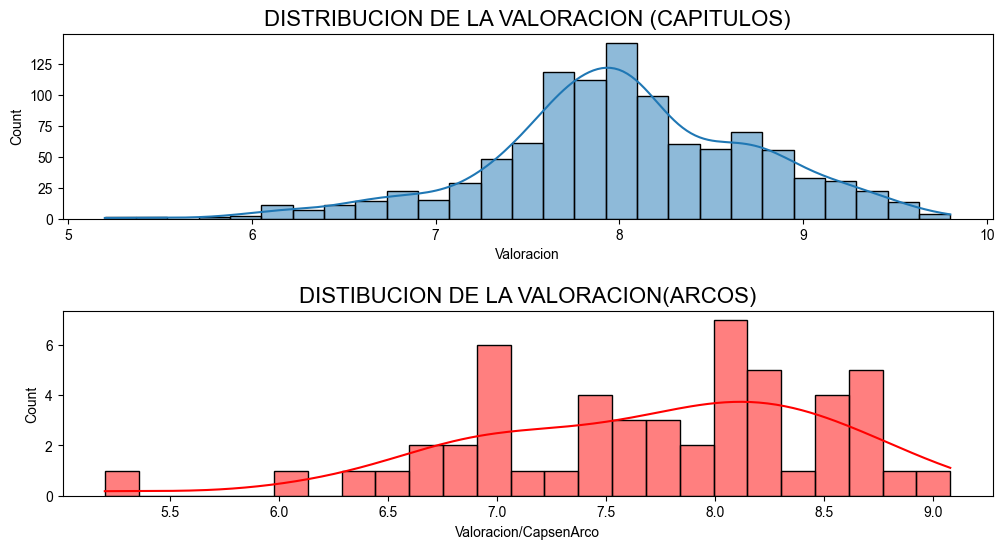

In [118]:
plt.figure(figsize= (12,6))

plt.subplot(211)
g1=sns.histplot(df_caps['Valoracion'], kde=True)
g1.set_title('DISTRIBUCION DE LA VALORACION (CAPITULOS)', fontsize=16)

plt.subplot(212)
g2=sns.histplot(df_arcos['Valoracion/CapsenArco'], kde=True, bins=25, color='red')
g2.set_title('DISTIBUCION DE LA VALORACION(ARCOS)', fontsize=16)

plt.subplots_adjust(hspace=0.5)
plt.show()

Como se esperaba tras analizar las medias y varianzas, los capítulos siguen una distribución mucho más cercana a la normal que los arcos

In [31]:
#Cuartiles de los capitulos
print('Capítulos')
print(df_caps['Valoracion'].quantile([0.25, 0.5, 0.75, 0.99]))
print('')

#Cuartiles de los arcos
print('Arcos')
print(df_arcos['Valoracion/CapsenArco'].quantile([0.25,0.5,0.75,.99]))

Capítulos
0.25    7.6300
0.50    8.0100
0.75    8.5000
0.99    9.5328
Name: Valoracion, dtype: float64

Arcos
0.25    7.047511
0.50    7.839183
0.75    8.255585
0.99    8.997602
Name: Valoracion/CapsenArco, dtype: float64


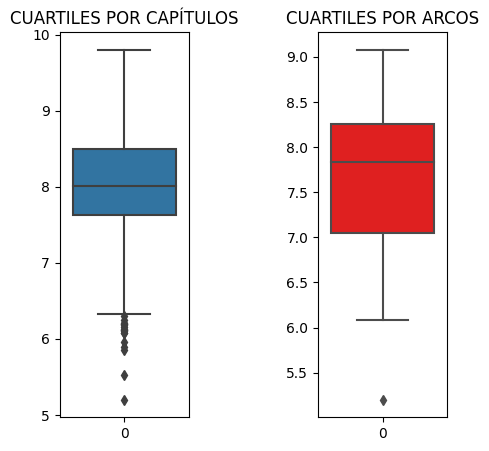

In [84]:
#Veámoslos en un boxplot
plt.figure(figsize=(5,5))

plt.subplot(121)
cuartiles_capitulos= sns.boxplot(df_caps['Valoracion'])
cuartiles_capitulos.set_title('CUARTILES POR CAPÍTULOS')

plt.subplot(122)
cuartiles_arcos=sns.boxplot(df_arcos['Valoracion/CapsenArco'], color='red')
cuartiles_arcos.set_title('CUARTILES POR ARCOS')

plt.subplots_adjust(wspace=1)

De las dos gráficas anteriores se pueden extraer las siguientes conclusiones:
- Los capítulos independientemente gustán más que los arcos completos. Supongo que esto tiene sentido ya que en cada arco hay varios capítulos más flojos.
- Aunque en los capítulos sueltos haya muchos más valores que se podrían considerar outliers, la distribución es mucho menos dispersa que en los arcos. Lo que quiere decir que aunque haya algunos que quedan por debajo, en promedio gustán más. 

Para entender mejor la distribucion de la ntoa de cada capítulo y de cada arco voy a intentar ver si existe alguna relación con la duración del arco, ya que tendría sentido pensar que los má largos va a acabar teniendo mejor nota, pero por experiencia personal creo que si uno es demasiado largo al final tampoco gusta. 

Para poder ver si existe la relación hare diferentes cosas.
- A raíz de los cuartiles voy a ver cuáles son los capítulos más y menos gustados y ver a qué arco perteneces y cuánto dura. 
- Por otro lado haré lo mismo con los arcos, vere cuáles tienen mayory menor valoración y veré cuánto duran.
- También estaría bien visualizar la nota de los arcos y el número de votos que han recibido con respecto al número de capítulos. 

In [33]:
worst_eps= (df_caps[df_caps['Valoracion']<6]).sort_values('Valoracion', ascending=False)
print('Peores capítulos')
worst_eps

Peores capítulos


,Nombre,Episodio,Valoracion,Votos,TimeSkip,Arco
491,"Saikyou Tag! Funtou, Luffy to Toriko!",492.0,5.96,624.0,0,Post-War Arc
291,Oshiro de Mochimaki Dai Race! Akai Hana no Inbou,292.0,5.90,715.0,0,Enies Lobby Arc
589,Jijou Saikyou Colabo VS Umi no Taishokukan,590.0,5.85,653.0,1,Punk Hazard Arc
335,Shutsudou Chopperman! Mamore Nagisa no TV-kyoku,336.0,5.53,783.0,0,Ice Hunter Arc
1036,Special Episode: Barto's Secret Room,NaN,5.20,1474.0,1,Extra Ep


In [34]:
print((df_arcos[df_arcos['Arcos']=='Post-War Arc']))
print((df_arcos[df_arcos['Arcos']=='Enies Lobby Arc']))
print((df_arcos[df_arcos['Arcos']=='Punk Hazard Arc']))
print((df_arcos[df_arcos['Arcos']=='Ice Hunter Arc']))
print((df_arcos[df_arcos['Arcos']=='Extra Ep']))

           Arcos  Valoracion/CapsenArco  NumeroEpisodios  Porcentaje%
35  Post-War Arc               8.044414               27          2.6
              Arcos  Valoracion/CapsenArco  NumeroEpisodios  Porcentaje%
24  Enies Lobby Arc               8.479469               49         4.73
              Arcos  Valoracion/CapsenArco  NumeroEpisodios  Porcentaje%
39  Punk Hazard Arc               7.702071               47         4.53
             Arcos  Valoracion/CapsenArco  NumeroEpisodios  Porcentaje%
26  Ice Hunter Arc                6.50377               11         1.06
       Arcos  Valoracion/CapsenArco  NumeroEpisodios  Porcentaje%
51  Extra Ep                    5.2                1          0.1


In [35]:
best_eps= (df_caps[df_caps['Valoracion']>=9.60]).sort_values('Valoracion', ascending=False)
best_eps

,Nombre,Episodio,Valoracion,Votos,TimeSkip,Arco
1016,Barrage of Powerful Techniques! The Fierce Att...,1017.0,9.80,5408.0,1,Wano Country Arc: Act 3
967,The Pirate King is Born: Arriving at the Last ...,968.0,9.70,12366.0,1,Wano Country Arc: Act 3
1014,Straw Hat Luffy! The Man Who Will Become the K...,1015.0,9.70,19789.0,1,Wano Country Arc: Act 3
807,Kanashiki Kettou: Luffy tai Sanji (Kouhen),808.0,9.63,6105.0,1,Whole Cake Island Arc
484,Kejime o Tsukeru: Shirohige vs Kurohige Kaizok...,485.0,9.61,5191.0,0,Marineford Arc
482,Kotae o Sagashite: Hiken Ace Senjou ni Shisu,483.0,9.60,6287.0,0,Marineford Arc


In [36]:
print((df_arcos[df_arcos['Arcos']=='Wano Country Arc: Act 3']))
print((df_arcos[df_arcos['Arcos']=='Whole Cake Island Arc']))
print((df_arcos[df_arcos['Arcos']=='Marineford Arc']))

                      Arcos  Valoracion/CapsenArco  NumeroEpisodios  \
50  Wano Country Arc: Act 3               8.920012               78   

    Porcentaje%  
50         7.52  
                    Arcos  Valoracion/CapsenArco  NumeroEpisodios  Porcentaje%
45  Whole Cake Island Arc                 8.6795               95         9.16
             Arcos  Valoracion/CapsenArco  NumeroEpisodios  Porcentaje%
34  Marineford Arc               9.078359               33         3.18


In [37]:
worst_arcs= (df_arcos[df_arcos['Valoracion/CapsenArco']<=6.75].sort_values('Valoracion/CapsenArco', ascending=False))
print('Peores arcos')
worst_arcs

Peores arcos


,Arcos,Valoracion/CapsenArco,NumeroEpisodios,Porcentaje%
42,Silver Mine Arc,6.736474,4,0.39
15,Goat Island Arc,6.723070,3,0.29
26,Ice Hunter Arc,6.503770,11,1.06
5,Buggy Side Story Arc,6.289787,2,0.19
30,Special Historical Arc,6.080000,2,0.19
51,Extra Ep,5.200000,1,0.10


In [38]:
best_arcs= (df_arcos[df_arcos['Valoracion/CapsenArco']>=8.6].sort_values('Valoracion/CapsenArco', ascending=False))
best_arcs

,Arcos,Valoracion/CapsenArco,NumeroEpisodios,Porcentaje%
34,Marineford Arc,9.078359,33,3.18
50,Wano Country Arc: Act 3,8.920012,78,7.52
48,Cidre Guild Arc,8.752177,2,0.19
29,Sabaody Archipelago Arc,8.748229,21,2.03
45,Whole Cake Island Arc,8.679500,95,9.16
47,Wano Country Arc: Act 1,8.660390,26,2.51
49,Wano Country Arc: Act 2,8.640878,41,3.95


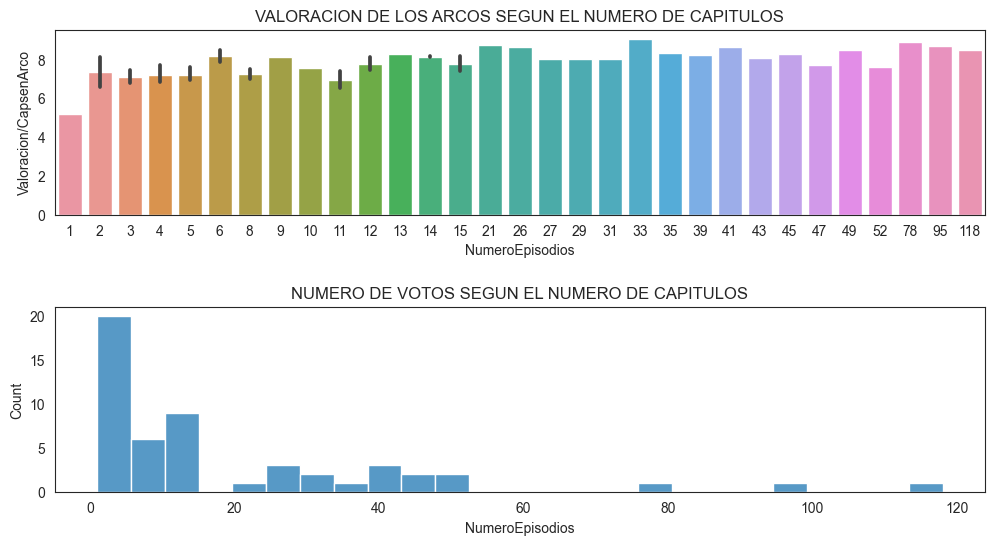

In [137]:
plt.figure(figsize=(12,6))
sns.set_style("white")
x = df_arcos['NumeroEpisodios']

plt.subplot(211)
arc1= sns.barplot(x=df_arcos['NumeroEpisodios'],y= df_arcos['Valoracion/CapsenArco'])
arc1.set_title('VALORACION DE LOS ARCOS SEGUN EL NUMERO DE CAPITULOS')

plt.subplot(212)
arc2= sns.histplot(df_arcos['NumeroEpisodios'], bins=25)
arc2.set_title('NUMERO DE VOTOS SEGUN EL NUMERO DE CAPITULOS')

plt.subplots_adjust(hspace=0.5)

Sí puede parecer que de los peores arcos la mayoría sean cortos, pero según los gráficos no parece que al público le gustén más los largos. Lo que parece es que lo que no gusta es el relleno, que suelen ser muy cortos. Habría que hacer otra clasificaciíon para estar seguros pero tiene pinta de ser eso. 

Además en el segundo gráfico que aprecia que hay muchos más arcos cortos que largos, por lo que aunque algunos tengas malas valoraciones por ser relleno, se camufla con la media en el gráfico superior.

Otro factor que puede afectar a la valoración de los capítulos y los arcos es el Timeskip.
El Timeskip es una división que se hace en la serie entre el capítulo 516 y 517, entre los cuales pasan dos años en los que los protagonistas están separados. Tras este periodo la narrativa de la serie cambia considerablemente, aunque el objetivo y los protagonistas son los mismos, aparecen nuevos personajes y se descubren muchos secretos que cambian el curso de la trama. 

Estaría bien por tanto ver si este suceso tiene importancia en la valoración qie el público tiene sobre la serie o cómo afecta en todo cas

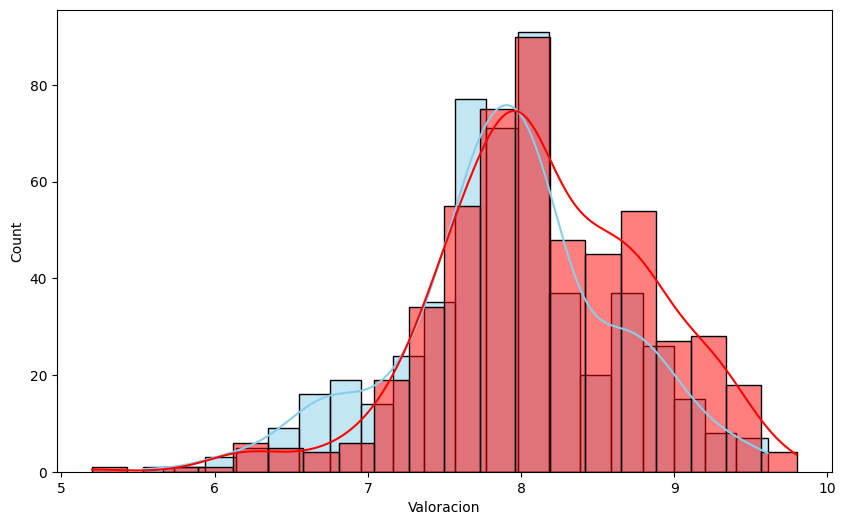

In [40]:
plt.figure(figsize= (10,6))

pre = sns.histplot(df_caps['Valoracion'][:516], color = 'skyblue', bins= 20, kde=True)
post=sns.histplot(df_caps['Valoracion'][516:], color = 'red', bins= 20, alpha= 0.5, kde=True)

Parece que sí parece que guste más la segunda parte de la serie, aunque la máxima frecuencia de ambos tramos coinciden en 8. Además parece que, aunque hay más episodios de la primera mitad que se acumulan un poco por debajo del 7, la falda de los últimos capítulos se extiende más hacia la izquierda, lo que podría significar que aunque en promedio es mejor, los capítulos peores son más malos que en la primera mitad.

### Análisis de los capitulos favoritos.
Una vez vista la posible influencia de la duración de los arcos y del timeskip sobre la valoración de los capítulos, podemos fijarnos en los capítulos como tal. No solo voy a escoger el capítulo mejor valorado, sino que voy a compararlo con el arco mejor valorado, ya que puede haber estadísticas engañosas. 

In [42]:
df_caps[df_caps['Valoracion']== df_caps['Valoracion'].max()]

,Nombre,Episodio,Valoracion,Votos,TimeSkip,Arco
1016,Barrage of Powerful Techniques! The Fierce Att...,1017.0,9.8,5408.0,1,Wano Country Arc: Act 3


In [100]:
df_arcos[df_arcos['Arcos']=='Marineford Arc']

,Arcos,Valoracion/CapsenArco,NumeroEpisodios,Porcentaje%,NumerodeVotos
34,Marineford Arc,9.078359,33,3.18,76029.0


In [109]:
best_ep_arc= df_caps[df_caps['Arco']=='Wano Country Arc: Act 3']

print('Media del arco:',best_ep_arc['Valoracion'].mean())
print('Mediana del arco:', best_ep_arc['Valoracion'].median())
print('Variaza de puntuacion: ', best_ep_arc['Valoracion'].var())
print('Valoracion del mejor capítulo:', best_ep_arc['Valoracion'].max())

Media del arco: 8.49628205128205
Mediana del arco: 8.695
Variaza de puntuacion:  0.7526158674658675
Valoracion del mejor capítulo: 9.8


In [111]:
df_arcos[df_arcos['Valoracion/CapsenArco']==df_arcos['Valoracion/CapsenArco'].max()]
best_arc= df_caps[df_caps['Arco']=='Marineford Arc']

print('Media del arco:',best_arc['Valoracion'].mean())
print('Mediana del arco:', best_arc['Valoracion'].median())
print('Variaza del arco:', best_arc['Valoracion'].var())
print('Valoracion mejor capítulo: ',best_arc['Valoracion'].max())



Media del arco: 8.89121212121212
Mediana del arco: 8.91
Variaza del arco: 0.29212973484848476
Valoracion mejor capítulo:  9.61


c:\Users\nicoc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\nicoc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


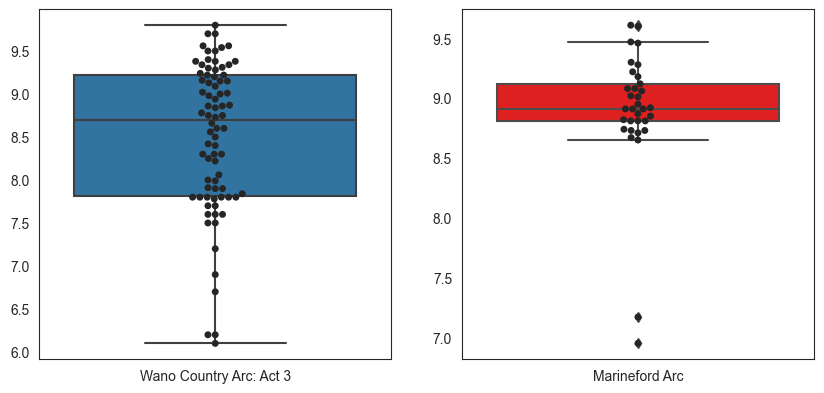

In [123]:
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.boxplot(pd.DataFrame({'Wano Country Arc: Act 3':best_ep_arc['Valoracion']}))
sns.swarmplot(pd.DataFrame({'Wano Country Arc: Act 3':best_ep_arc['Valoracion']}), color = 'black')

plt.subplot(222)
sns.boxplot(pd.DataFrame({'Marineford Arc':best_arc['Valoracion']}), color='red')
sns.swarmplot(pd.DataFrame({'Marineford Arc':best_arc['Valoracion']}), color= 'black');


## Conclusiones
Lógicamente tanto la media como la mediana del arco Marineford son mayores qeu las de Wano, mientras que el mejor capítulo es al revés. Sin emabrgo a mí lo que me llama la atención son tanto las varianzas como el boxplot. Las valoraciones de Marineford no sólo son mayores sino que mucho más homogéneas, y se encuentran todas entorno al 9. Aunque hay dos outliers negativos, eso significa que la mayoría de valores se encuentran dentro de la caja, mientras que en el gráfico de la izquierda hay muchos que están fuera. 

Hay que tener encuenta además que la mayoría de capítulos del anime duran apenas 20 minutos, lo cual me hace pensar que igual, si queremos pensar en el mejor capítulo, igual hay que darle más importancia a la valoración que se le da al arco completo que la de un capítulo suelto. 
Y por eso mi conclusión tras ver el conjunto de datos y sacar toda la información que me ha sido posible, es que aunque este una decimas por debajo, el mejor capítulo del mejor arco supera al mejor capítulo de toda la serie. 